In [1]:
from modelo.plot_board import plot_table as pt
from modelo.find_opt import Opt_colection
from modelo.temps import Temperatura_Simulada as ts
from modelo.funcoes_8_rainhas import *
import time

### Projeção da função f(x)

In [2]:
def f(array):
    atks = 0
    for i in range(len(array)):
        for n in range(i + 1, len(array)):  # Evita comparar a mesma posição
            # Verifica se estão na mesma diagonal ou na mesma linha
            if np.abs(n - i) == np.abs(array[i] - array[n]) or array[i] == array[n]:
                atks += 1

    return 28 - atks 


A função recebe um array, onde cada posição é uma coluna diferente e o valor gardado é a linha que a rainha se encontra.
A variável atks representa a quantidade de pares que estão se atacando, assim
 a função retorna a quantidade de pares que possíveis entre
as rinhas menos os pares que se atacam.

### Temperatura inicial

A temperatura inicial foi calculada usando o resultado ótimo da função multiplicado por 4. Essa preferência foi alcançada atravez te teste empíricos feitos com o algoritmo.

### Testes para diferentes escalonamentos

In [3]:
# Funções de escalonamentos expostas

def default_decay(self, t, i):
    return t * 0.99

def deacay_1(self, t, i):
    return t/(1+0.99*np.sqrt(t))

def decay_2(self, t, i):
    delta = (t - self.temperatura)/i
    return t - delta


### Default_decay

In [4]:
tempera = ts(8, f, amostra, perturb(2), temperatura=28*4)
print(Opt_colection.get_mean_time(tempera, 28))

  0%|          | 0/5000 [00:00<?, ?it/s]c:\Users\henri\Documents\pythonProjcs\trabalho_ia\algoritmo\parte2\modelo\temps.py:56: RuntimeWarning: overflow encountered in exp
  return np.exp(- ((f_cand - f_opt)/ temperatura))
100%|██████████| 5000/5000 [05:26<00:00, 15.31it/s]


Media do tempo de execução: 0.06502794299125671;
Resultados ótimos: 5000;
Resultados subótimos: 0;
Porcentagem de resultados ótimos: 100.0 



### Decay 1

In [5]:
tempera = ts(8, f, amostra, perturb(2), temperatura=28*4, decay = 1)
print(Opt_colection.get_mean_time(tempera, 28))

100%|██████████| 5000/5000 [05:31<00:00, 15.06it/s]


Media do tempo de execução: 0.06611362791061401;
Resultados ótimos: 5000;
Resultados subótimos: 0;
Porcentagem de resultados ótimos: 100.0 



### Decay 2

In [6]:
tempera = ts(8, f, amostra, perturb(2), temperatura=28*4, decay = 2)
print(Opt_colection.get_mean_time(tempera, 28))

100%|██████████| 5000/5000 [05:30<00:00, 15.11it/s]


Media do tempo de execução: 0.06590840282440186;
Resultados ótimos: 5000;
Resultados subótimos: 0;
Porcentagem de resultados ótimos: 100.0 



### Função de pertubação

A pertubação é feita escolhendo duas posições aleatórias do array e trocando elas.

In [7]:
# Função de pertubação exposta

def function(array):
    # novo array
    x_cand = np.copy(array)
    poicoes = np.random.choice(len(array), 2, replace= False)
    x_cand[poicoes] = np.random.permutation(x_cand[poicoes])
    return x_cand

### Procurando todas as 92 combinações ótimas

Análise  custo computaciona em função do tempo para o algortimo conseguir gerar todas as 92 combinações que maximizão a função.

In [11]:
# Usando a biblioteca time
tempera = ts(8, f, amostra, perturb(2), temperatura=28*4)

init = time.time()
Opt_colection.get_bests(tempera)
end = time.time()
print("{:.2f}s".format(end - init))

c:\Users\henri\Documents\pythonProjcs\trabalho_ia\algoritmo\parte2\modelo\temps.py:56: RuntimeWarning: overflow encountered in exp
  return np.exp(- ((f_cand - f_opt)/ temperatura))


30.00s


c:\Users\henri\Documents\pythonProjcs\trabalho_ia\algoritmo\parte2\modelo\temps.py:56: RuntimeWarning: overflow encountered in exp
  return np.exp(- ((f_cand - f_opt)/ temperatura))


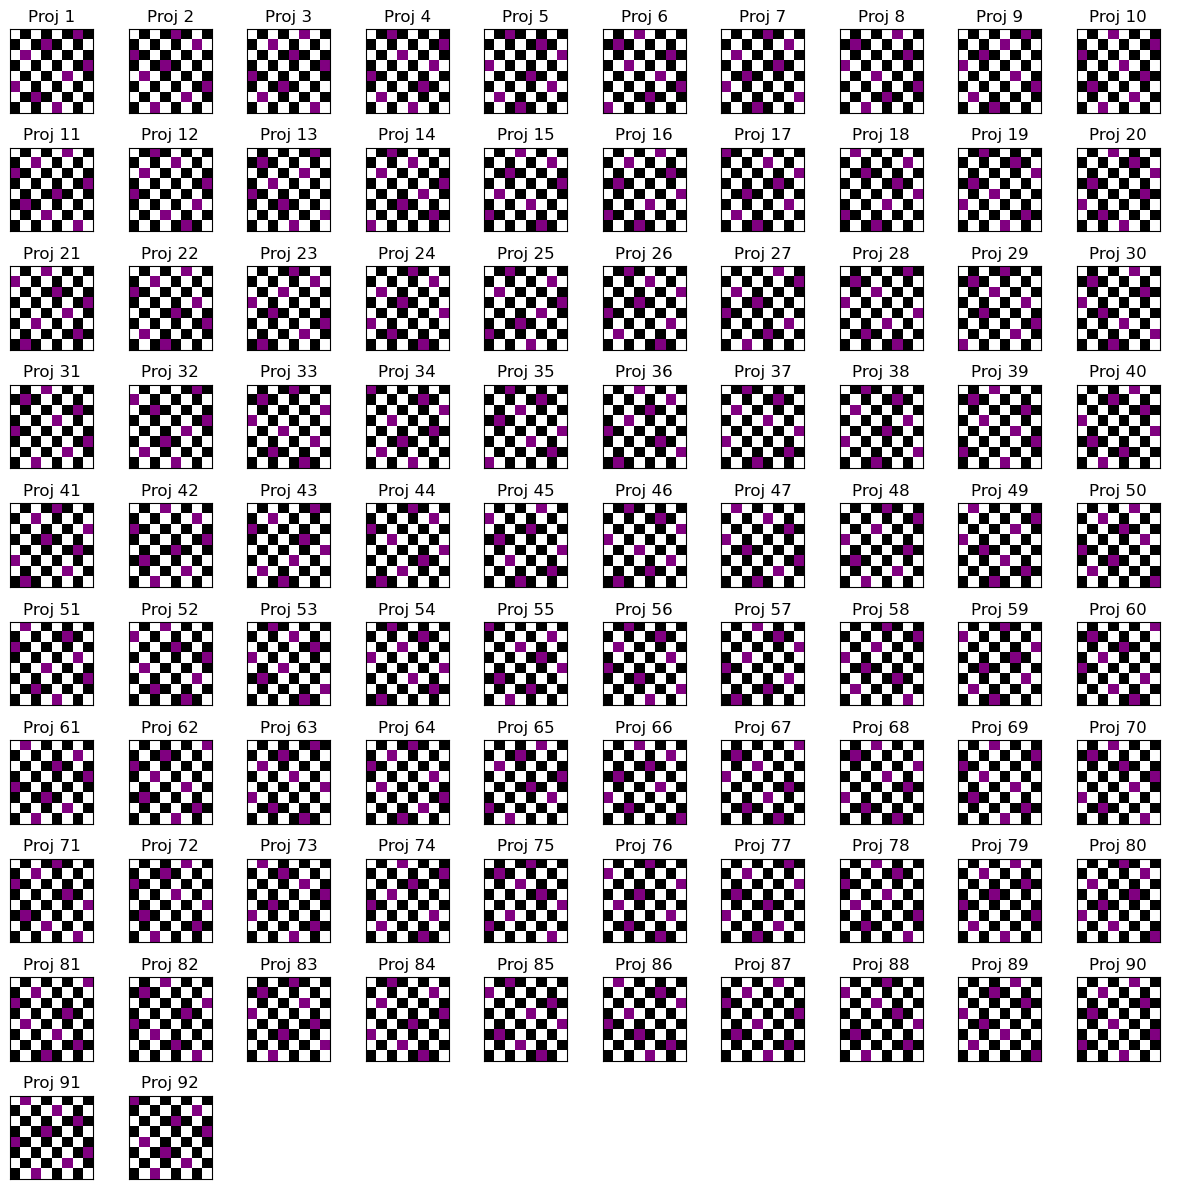

In [2]:
tempera = ts(8, f, amostra, perturb(2), temperatura=28*4)
amostras = Opt_colection.get_bests(tempera)
pt.plot_all_projections(amostras)

### Projeção com linhas de ameaça

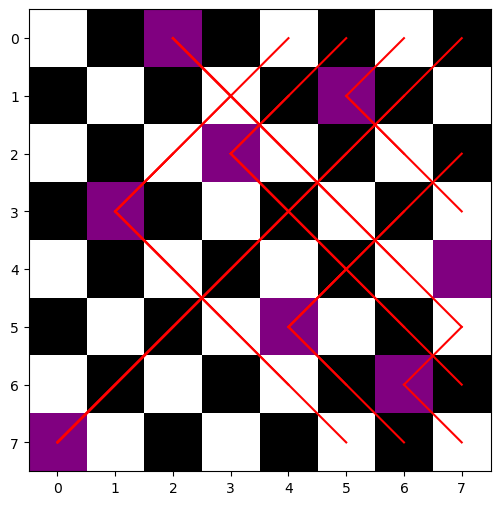

In [2]:
tempera = ts(8, f, amostra, perturb(2), temperatura=28*4)
amostra = tempera.optmizar()[0]
pt.Pboard_lines(amostra)